In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import sys
from meta_model.utils import ndcg_sim, ndcg, custom_sim
import matplotlib.pyplot as plt
sys.path.append("meta_model")

In [2]:
# from sklearn.preprocessing import minmax_scale, StandardScaler, normalize
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE, MDS
# from scipy.stats import wasserstein_distance
# import matplotlib.pyplot as plt
# df1 = pd.read_csv("meta_dataset_creation/data/meta_features/original/if_meta_features.csv", index_col="id")
# df2 = pd.read_csv("meta_dataset_creation/data/meta_features/from_numeric/if_meta_features.csv", index_col="id")

# meta_X1 = df1.to_numpy()
# meta_X2 = df2.to_numpy()
# # sc = StandardScaler().fit(meta_X1)
# scaled_matrix1 = meta_X1/meta_X1.shape[1] #sc.transform(meta_X1)
# scaled_matrix2 = meta_X2/meta_X2.shape[1] #sc.transform(meta_X2)
# print("Number of meta features1:", meta_X1.shape[1])
# print("Number of instances1:", meta_X1.shape[0])
# print("Number of meta features2:", meta_X2.shape[1])
# print("Number of instances2:", meta_X2.shape[0])
# X = TSNE(n_components=2, metric=wasserstein_distance, init="pca",
#     learning_rate="auto", n_jobs=-1).fit_transform(np.concatenate((scaled_matrix1, scaled_matrix2)))

In [3]:
# plt.figure(figsize=(5, 5))
# plt.scatter(
#     X[:meta_X1.shape[0], 0], X[:meta_X1.shape[0], 1], s=20,
#     alpha=0.7,
#     linewidth=0,
#     c="green"
# )
# indices = np.random.choice(meta_X2.shape[0], size=500, replace=False) + meta_X1.shape[0]
# plt.scatter(
#     X[indices, 0], X[indices, 1], s=20,
#     alpha=0.7,
#     linewidth=0,
#     c="red"
# )
# plt.xticks([])
# plt.yticks([])
# plt.tight_layout()
# plt.show()

In [4]:
benchmark_results = {}
benchmark_results_dir = "meta_dataset_creation/data/benchmark_results/"
clustering_algorithms = os.listdir(benchmark_results_dir)
clustering_algorithms

['kprototypes']

In [5]:
for algorithm in clustering_algorithms:
    benchmark_results[algorithm] = {}
    for name in os.listdir(os.path.join(benchmark_results_dir, algorithm)):
        benchmark_results[algorithm][name] = {}
        folder_path = os.path.join(benchmark_results_dir, algorithm, name)
        scores_dir = os.path.join(folder_path, "scores/")
        for filename in os.listdir(scores_dir):
            data_id = filename.split('.')[0]
            with open(os.path.join(scores_dir, filename), "rb") as f:
                result = pickle.load(f)
            for sim_pair in result:
                for eval_metric in result[sim_pair]:
                    if eval_metric not in benchmark_results[algorithm][name]:
                        benchmark_results[algorithm][name][eval_metric] = {}
                    if data_id not in benchmark_results[algorithm][name][eval_metric]:
                        benchmark_results[algorithm][name][eval_metric][data_id] = {}
                    benchmark_results[algorithm][name][eval_metric][data_id][sim_pair] = \
                        max([v["score"] for v in result[sim_pair][eval_metric]])
        for eval_metric in benchmark_results[algorithm][name]:
            benchmark_results[algorithm][name][eval_metric] = \
                pd.DataFrame.from_dict(benchmark_results[algorithm][name][eval_metric], orient='index')
            benchmark_results[algorithm][name][eval_metric] = \
                benchmark_results[algorithm][name][eval_metric].fillna(-1)
            max_ = benchmark_results[algorithm][name][eval_metric].max(axis=1)
            benchmark_results[algorithm][name][eval_metric] = benchmark_results[algorithm][name][eval_metric][max_ >= 0.7]
            print(algorithm, name, eval_metric, benchmark_results[algorithm][name][eval_metric].shape)

In [ ]:
algorithm = 'kprototypes'
eval_metric = 'acc'

In [ ]:
benchmark_results[algorithm]["from_numeric"][eval_metric].head()

,euclidean_hamming,euclidean_eskin,euclidean_iof,euclidean_of,euclidean_jaccard,euclidean_dice,euclidean_kulsinski,euclidean_rogerstanimoto,euclidean_russellrao,euclidean_sokalmichener,...,pearson_co-oc,pearson_jaccard,pearson_dice,pearson_kulsinski,pearson_rogerstanimoto,pearson_russellrao,pearson_sokalmichener,pearson_sokalsneath,lorentzian_co-oc,divergence_co-oc
101_1543,0.431481,0.431481,0.437963,0.519444,0.314815,0.314815,0.295370,0.262963,0.295370,0.262963,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
106_1488,0.682051,0.676923,0.682051,0.682051,0.717949,0.717949,0.717949,0.671795,0.728205,0.671795,...,0.692308,0.712821,0.712821,0.712821,0.697436,0.712821,0.697436,0.717949,0.600000,0.656410
116_1413,0.780000,0.806667,0.780000,0.780000,0.780000,0.780000,0.793333,0.780000,0.793333,0.780000,...,-1.000000,0.726667,0.726667,0.726667,0.726667,0.726667,0.726667,0.726667,-1.000000,-1.000000
117_1065,0.866812,0.866812,0.866812,0.866812,0.866812,0.866812,0.871179,0.866812,0.901747,0.866812,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.866812,0.602620
126_1067,0.825984,0.854908,0.825984,0.825510,0.825984,0.825984,0.825984,0.825984,0.825984,0.825984,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.852537,0.667615


In [ ]:
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
mixed_meta_df = pd.read_csv("meta_dataset_creation/data/meta_features/original/meta_features.csv", index_col="id").drop_duplicates()
mixed_meta_df.index = mixed_meta_df.index.astype(str)
print("Number of meta features:", mixed_meta_df.shape[1])
print("Number of instances:", mixed_meta_df.shape[0])

Number of meta features: 61
Number of instances: 91


In [ ]:
numeric_meta_df = pd.read_csv("meta_dataset_creation/data/meta_features/from_numeric/meta_features.csv", index_col="id").drop_duplicates()
numeric_meta_df.index = numeric_meta_df.index.astype(str)
print("Number of meta features:", numeric_meta_df.shape[1])
print("Number of instances:", numeric_meta_df.shape[0])

Number of meta features: 61
Number of instances: 500


In [ ]:
from sklearn.metrics import pairwise_distances
index = benchmark_results[algorithm]["original"][eval_metric].index
mixed_Y = benchmark_results[algorithm]["original"][eval_metric][index.isin(mixed_meta_df.index)].to_numpy()
mixed_Yn = np.array([y/max(y) for y in mixed_Y])
mixed_Yn[mixed_Yn>0] **= 4
mixed_Yn[mixed_Yn<0] = -1

index = benchmark_results[algorithm]["from_numeric"][eval_metric].index
numeric_Y = benchmark_results[algorithm]["from_numeric"][eval_metric][index.isin(numeric_meta_df.index)].to_numpy()
numeric_Yn = np.array([y/max(y) for y in numeric_Y])
numeric_Yn[numeric_Yn>0] **= 4
numeric_Yn[numeric_Yn<0] = -1

sim_matrix = pairwise_distances(np.concatenate((mixed_Yn, numeric_Yn)), metric=lambda y1,y2: ndcg_sim(y1,y2,p=5), n_jobs=-1)

In [ ]:
index = benchmark_results[algorithm]["original"][eval_metric].index
mixed_X = mixed_meta_df.loc[[i for i in index if i in mixed_meta_df.index]].to_numpy()

index = benchmark_results[algorithm]["from_numeric"][eval_metric].index
numeric_X = numeric_meta_df.loc[[i for i in index if i in numeric_meta_df.index]].to_numpy()
sc = StandardScaler().fit(np.concatenate((mixed_X, numeric_X))) #StandardScaler().fit(mixed_X) #
mixed_X = sc.transform(mixed_X) # mixed_X/mixed_X.shape[1] #
numeric_X = sc.transform(numeric_X) # numeric_X/numeric_X.shape[1] #

mixed_X.shape, numeric_X.shape

((36, 61), (78, 61))

In [ ]:
X = np.concatenate((mixed_X, numeric_X))
Y = np.concatenate((mixed_Y, numeric_Y))
Yn = np.concatenate((mixed_Yn, numeric_Yn))

In [ ]:
k = 5
D = pairwise_distances(X, n_jobs=-1)
np.fill_diagonal(D, np.inf)
ndcg_nn_euclidean = []
for i, dist_vec in enumerate(D):
    nearest_neighbors = [j for j in np.argsort(dist_vec) if j != i][:k]
    ndcg_nn_euclidean.append(np.mean(sim_matrix[i][nearest_neighbors]))

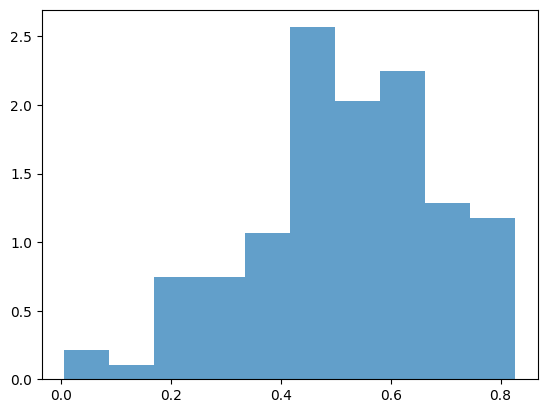

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ndcg_nn_euclidean, 10, density=True, alpha=0.7)
plt.show()

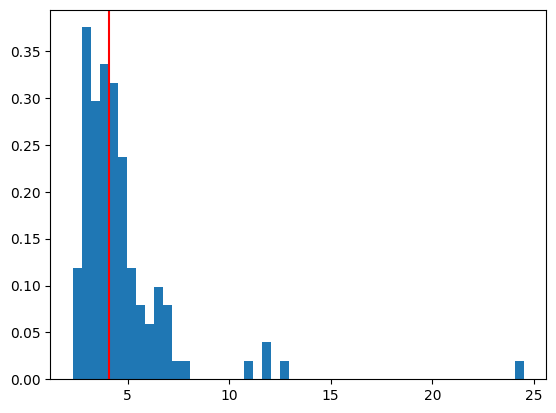

36


In [ ]:
D = pairwise_distances(X)
np.fill_diagonal(D, np.inf)
nearest_neighbors_distance = np.sort(D, axis=1)[:, :5]
nearest_neighbors_distance = np.mean(nearest_neighbors_distance, axis=1)
median_distance = np.quantile(nearest_neighbors_distance, 0.5)
plt.hist(nearest_neighbors_distance, 50, density=True)
# plt.hist(nearest_neighbors_distance[:mixed_X.shape[0]], 30, density=True)
plt.axvline(median_distance, color="red")
plt.show()
selected_datasets = [i for i in range(mixed_X.shape[0])] # if nearest_neighbors_distance[i] <= median_distance and np.mean(sorted(sim_matrix[i], reverse=True)[:5])>0.95
# if np.mean(sorted(sim_matrix[i], reverse=True)[:3])>0.6 #if np.mean(sorted(sim_matrix[i][np.argsort(D[i])[:30]], reverse=True)[:5])>0.8
selected_datasets = np.array(selected_datasets)
print(len(selected_datasets))
# mixed_X = mixed_X[selected_datasets]
# mixed_Y = mixed_Y[selected_datasets]
# mixed_Yn = mixed_Yn[selected_datasets]

In [ ]:
from meta_model.utils import ndcg
from meta_model.ranking import ALL_MODELS
from meta_model.ranking_tree import RankingTree
from sklearn.model_selection import KFold

models = {
    "KNN": ALL_MODELS["KNN"](),
    "RF": ALL_MODELS["RF"](),
    "KNN with aug.": ALL_MODELS["KNN"](),
    "RF with aug.": ALL_MODELS["RF"](),
}
predictions = {model_name: np.zeros(shape=(len(selected_datasets), 120)) for model_name in models}
predictions["AR"] = np.zeros(shape=(len(selected_datasets), 120))
i = 0

for _, test in KFold(n_splits=10, shuffle=True, random_state=0).split(X[selected_datasets]):
    print(i, "---------------------------------------")
    test_index = selected_datasets[test]

    train_index = [j for j in range(mixed_X.shape[0]) if j not in test_index]
    X_train, X_test = X[train_index], X[test_index]
    Y_trainr, Y_testr = Y[train_index], Y[test_index]
    for model_name in ["KNN", "RF"]:
        print(model_name, end=": ")
        models[model_name] = models[model_name].cross_val_fit(X_train, Y_trainr, n_splits=5) #
        print(models[model_name].get_params())
        predictions[model_name][test] = models[model_name].predict(X_test)

    train_index = [j for j in range(X.shape[0]) if j not in test_index]
    X_train, X_test = X[train_index], X[test_index]
    Y_trainr, Y_testr = Y[train_index], Y[test_index]
    for model_name in ["KNN with aug.", "RF with aug."]:
        models[model_name] = models[model_name].cross_val_fit(X_train, Y_trainr, n_splits=5) #
        print(models[model_name].get_params())
        predictions[model_name][test] = models[model_name].predict(X_test)

    predictions["AR"][test] = np.array([
        [np.mean([v for v in Y_trainr[:, j] if v > 0]) for j in range(Y_trainr.shape[1])]
        for _ in Y_testr
    ])
    i += 1

0 ---------------------------------------
KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
RF: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 50}
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 50}
1 ---------------------------------------
KNN: {'metric': 'cosine', 'n_neighbors': 5, 'weights': 'uniform'}
RF: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 100}
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 50}
2 ---------------------------------------
KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
RF: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
{'max_depth': None, 'max_features':

In [ ]:
import torch
import torch.nn as nn
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"
print("device:", device)

class View(nn.Module):
    def __init__(self, shape):
        super(View, self).__init__()
        self.shape = shape
    def forward(self, x):
        return x.view(*self.shape)

device: cuda:0


In [ ]:
from metric_learning import ContrastiveML
import ranking
from sklearn.metrics import pairwise_distances

class MetaModel():
    def __init__(self, mapping_function=None, ranking_model="KNN", margin=1, device="cpu"):
        self.metric_learner = None if mapping_function is None else \
            ContrastiveML(mapping_function, margin)
        self.ranker = ranking.ALL_MODELS[ranking_model]()
        self.device = device

    def _create_similarity_matrix(self, Y1, Y2=None):
        return pairwise_distances(Y1, Y2, metric=lambda y1,y2: ndcg_sim(y1,y2,p=5), n_jobs=-1)
        # return pairwise_distances(Y1, Y2, metric=lambda y1, y2: custom_sim(y1, y2), n_jobs=-1)

    # def train_metric_learner(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
    #     if self.metric_learner is None:
    #         return self
    #     sim_matrix = self._create_similarity_matrix(Y_train)
    #     X1, X2, y = [], [], []
    #     for i in range(X_train.shape[0]-1):
    #         for j in range(i+1, X_train.shape[0]):
    #             X1.append(X_train[i])
    #             X2.append(X_train[j])
    #             similar = sim_matrix[i, j] > 0.95
    #             y.append(0 if similar else 1)
    #     X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #     print()
    #     print("classes distribution in train set:", np.unique(y, return_counts=True))
    #     train_dataset = torch.utils.data.TensorDataset(
    #         torch.tensor(X1, device=self.device).float(),
    #         torch.tensor(X2, device=self.device).float(),
    #         torch.tensor(y, device=self.device).float()
    #     )
    #     test_dataset = None
    #     if X_test is not None:
    #         sim_matrix = self._create_similarity_matrix(Y_test, Y_train)
    #         X1, X2, y = [], [], []
    #         for i in range(X_test.shape[0]):
    #             for j in range(X_train.shape[0]):
    #                 X1.append(X_test[i])
    #                 X2.append(X_train[j])
    #                 similar = sim_matrix[i, j] > 0.95
    #                 y.append(0 if similar else 1)
    #         X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #         print()
    #         print("classes distribution in test set:", np.unique(y, return_counts=True))
    #         test_dataset = torch.utils.data.TensorDataset(
    #             torch.tensor(X1, device=self.device).float(),
    #             torch.tensor(X2, device=self.device).float(),
    #             torch.tensor(y, device=self.device).float()
    #         )
        
    #     self.metric_learner.to(self.device)
    #     optimizer = torch.optim.Adam(self.metric_learner.parameters(), lr=metric_learning_params["lr"])
    #     metric_learning_params.pop("lr")
    #     self.metric_learner.fit(train_dataset, optimizer, test_dataset=test_dataset, **metric_learning_params)
    #     return self

    # def train_metric_learner(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
    #     if self.metric_learner is None:
    #         return self
    #     sim_matrix = self._create_similarity_matrix(Y_train)
    #     d = pairwise_distances(X_train)
    #     np.fill_diagonal(d, np.inf)
    #     k = 30
    #     nearest_neighbors = np.argsort(d, axis=1)[:, :k]
    #     X1, X2, y = [], [], []
    #     for i in range(X_train.shape[0]):
    #         l = [j for j in np.argsort(-sim_matrix[i]) if j in nearest_neighbors[i]][:5]
    #         for j in nearest_neighbors[i]:
    #             if j in l:
    #                 X1.append(X_train[i])
    #                 X2.append(X_train[j])
    #                 y.append(0)
    #             elif sim_matrix[i, j] < 0.95:
    #                 X1.append(X_train[i])
    #                 X2.append(X_train[j])
    #                 y.append(1)

    #     X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #     print()
    #     print("classes distribution in train set:", np.unique(y, return_counts=True))
    #     train_dataset = torch.utils.data.TensorDataset(
    #         torch.tensor(X1, device=self.device).float(),
    #         torch.tensor(X2, device=self.device).float(),
    #         torch.tensor(y, device=self.device).float()
    #     )
    #     test_dataset = None
    #     if X_test is not None:
    #         sim_matrix = self._create_similarity_matrix(Y_test, Y_train)
    #         d = pairwise_distances(X_test, X_train)
    #         nearest_neighbors = np.argsort(d, axis=1)[:, :k]
    #         X1, X2, y = [], [], []
    #         for i in range(X_test.shape[0]):
    #             l = [j for j in np.argsort(-sim_matrix[i]) if j in nearest_neighbors[i]][:5]
    #             for j in nearest_neighbors[i]:
    #                 if j in l:
    #                     X1.append(X_test[i])
    #                     X2.append(X_train[j])
    #                     y.append(0)
    #                 elif sim_matrix[i, j] < 0.95:
    #                     X1.append(X_test[i])
    #                     X2.append(X_train[j])
    #                     y.append(1)
    #         X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #         print()
    #         print("classes distribution in test set:", np.unique(y, return_counts=True))
    #         test_dataset = torch.utils.data.TensorDataset(
    #             torch.tensor(X1, device=self.device).float(),
    #             torch.tensor(X2, device=self.device).float(),
    #             torch.tensor(y, device=self.device).float()
    #         )
        
    #     self.metric_learner.to(self.device)
    #     optimizer = torch.optim.Adam(self.metric_learner.parameters(), lr=metric_learning_params["lr"])
    #     metric_learning_params.pop("lr")
    #     self.metric_learner.fit(train_dataset, optimizer, test_dataset=test_dataset, **metric_learning_params)
    #     return self

    def train_metric_learner(self, X_train, Y_train, metric_learning_params, X_val=None, Y_val=None):
        if self.metric_learner is None:
            return self
        k = 5
        sim_matrix = self._create_similarity_matrix(Y_train)
        np.fill_diagonal(sim_matrix, 0)
        nearest_neighbors = np.argsort(-sim_matrix, axis=1)[:, :k]
        X1, X2, y = [], [], []
        for i in range(X_train.shape[0]):
            for j in nearest_neighbors[i]:
                X1.append(X_train[i])
                X2.append(X_train[j])
                y.append(0)
        for i in range(X_train.shape[0]-1):
            for j in range(i, X_train.shape[0]):
                if i not in nearest_neighbors[j] and j not in nearest_neighbors[i]:
                    X1.append(X_train[i])
                    X2.append(X_train[j])
                    y.append(1)
        X1, X2, y = np.array(X1), np.array(X2), np.array(y)
        print("classes distribution in train set:", np.unique(y, return_counts=True))
        train_set = torch.utils.data.TensorDataset(
            torch.tensor(X1, device=self.device).float(),
            torch.tensor(X2, device=self.device).float(),
            torch.tensor(y, device=self.device).float()
        )
        train_loader = torch.utils.data.DataLoader(train_set, batch_size=metric_learning_params["batch_size_train"])

        val_loader = None
        if X_val is not None:
            sim_matrix = self._create_similarity_matrix(Y_val, Y_train)
            nearest_neighbors = np.argsort(-sim_matrix, axis=1)[:, :k]
            X1, X2, y = [], [], []
            for i in range(X_val.shape[0]):
                for j in range(X_train.shape[0]):
                    X1.append(X_val[i])
                    X2.append(X_train[j])
                    y.append(0 if j in nearest_neighbors[i] else 1)
            X1, X2, y = np.array(X1), np.array(X2), np.array(y)
            print("classes distribution in train set:", np.unique(y, return_counts=True))
            val_set = torch.utils.data.TensorDataset(
                torch.tensor(X1, device=device).float(),
                torch.tensor(X2, device=device).float(),
                torch.tensor(y, device=device).float()
            )
            val_loader = torch.utils.data.DataLoader(val_set, batch_size=metric_learning_params["batch_size_val"])
                    
        self.metric_learner.to(self.device)
        optimizer = torch.optim.Adam(
            self.metric_learner.parameters(),
            lr=metric_learning_params["lr"],
            weight_decay=metric_learning_params["weight_decay"]
        )
        self.metric_learner.fit(
            train_loader, optimizer, 
            val_loader=val_loader,
            epochs=metric_learning_params["epochs"]
        )

    def embbed(self, X):
        if self.metric_learner is None:
            return X
        with torch.no_grad():
            Z = self.metric_learner(torch.tensor(X, device=self.device).float()).cpu().detach().numpy()
        return Z

    def train_ranker(self, Ztrain, Y_train):
        self.ranker = self.ranker.cross_val_fit(Ztrain, Y_train)
        return self


    def fit(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
        self.train_metric_learner(X_train, Y_train, metric_learning_params, X_test=X_test, Y_test=Y_test)
        Ztrain = self.embbed(X_train)
        self.train_ranker(Ztrain, Y_train)
        return self

    def predict(self, X):
        return self.ranker.predict(self.embbed(X))

In [ ]:
from metric_learning import AE
import ranking
from sklearn.metrics import pairwise_distances

class MetaModel2():
    def __init__(self, encoder=None, decoder=None, ranking_model="KNN", device="cpu"):
        self.metric_learner = None if encoder is None else \
            AE(encoder, decoder)
        self.ranker = ranking.ALL_MODELS[ranking_model]()
        self.device = device

    def train_metric_learner(self, X_train, metric_learning_params, X_val=None):
        train_set = torch.utils.data.TensorDataset(torch.tensor(X_train, device=self.device).float())
        train_loader = torch.utils.data.DataLoader(train_set, batch_size=metric_learning_params["batch_size_train"])
        
        val_loader = None
        if X_val is not None:
            val_set = torch.utils.data.TensorDataset(torch.tensor(X_val, device=self.device).float())
            val_loader = torch.utils.data.DataLoader(val_set, batch_size=metric_learning_params["batch_size_val"])
        
        self.metric_learner.to(self.device)
        optimizer = torch.optim.Adam(
            self.metric_learner.parameters(),
            lr=metric_learning_params["lr"],
            weight_decay=metric_learning_params["weight_decay"]
        )
        self.metric_learner.fit(
            train_loader, optimizer, 
            val_loader=val_loader,
            epochs=metric_learning_params["epochs"]
        )
        return self

    def embbed(self, X):
        if self.metric_learner is None:
            return X
        with torch.no_grad():
            Z = self.metric_learner(torch.tensor(X, device=self.device).float()).cpu().detach().numpy()
        return Z

    def train_ranker(self, Ztrain, Y_train):
        self.ranker = self.ranker.cross_val_fit(Ztrain, Y_train)
        return self


    def fit(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
        self.train_metric_learner(X_train, Y_train, metric_learning_params, X_test=X_test, Y_test=Y_test)
        Ztrain = self.embbed(X_train)
        self.train_ranker(Ztrain, Y_train)
        return self

    def predict(self, X):
        return self.ranker.predict(self.embbed(X))

In [ ]:
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from scipy.stats import wasserstein_distance

Xemb = TSNE(n_components=2, metric="manhattan").fit_transform(mixed_X)
# Xemb = MDS(n_components=2, dissimilarity="precomputed").fit_transform(pairwise_distances(X, metric=wasserstein_distance,n_jobs=-1))

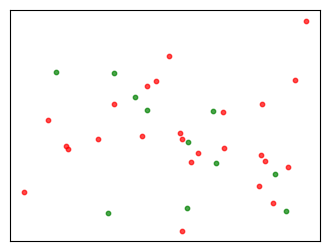

In [ ]:
sim_pair = 69
good = [i for i, y in enumerate(mixed_Y) if y[sim_pair]/max(y) > .95]
bad = [i for i, y in enumerate(mixed_Y) if i not in good]
labels = [1 if y[sim_pair]/max(y) > .95 else 0 for y in mixed_Y]
plt.figure(figsize=(4, 3))
plt.scatter(Xemb[good, 0], Xemb[good, 1], s=10, c="green", alpha=0.7)
plt.scatter(Xemb[bad, 0], Xemb[bad, 1], s=10, c="red", alpha=0.7)
plt.xticks([])
plt.yticks([])
plt.show()

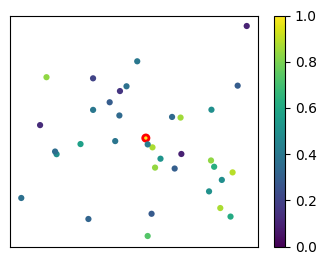

In [ ]:
i = selected_datasets[0]
plt.figure(figsize=(4, 3))
plt.scatter(
    Xemb[:, 0], Xemb[:, 1], c=sim_matrix[i][:mixed_X.shape[0]], s=20, alpha=1, 
    edgecolors=['none' if k!=i else "red" for k in range(Xemb.shape[0])],
    linewidth=[0 if k!=i else 2 for k in range(Xemb.shape[0])],
    vmin=0, vmax=1
)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

Epoch 1/200: train_loss=0.914, val_loss=2.96
Epoch 2/200: train_loss=0.814, val_loss=2.85
Epoch 3/200: train_loss=0.657, val_loss=2.7
Epoch 4/200: train_loss=0.586, val_loss=2.47
Epoch 5/200: train_loss=0.525, val_loss=2.22
Epoch 6/200: train_loss=0.461, val_loss=2.05
Epoch 7/200: train_loss=0.439, val_loss=2.03
Epoch 8/200: train_loss=0.406, val_loss=2.02
Epoch 9/200: train_loss=0.409, val_loss=2
Epoch 10/200: train_loss=0.373, val_loss=1.94
Epoch 11/200: train_loss=0.333, val_loss=1.96
Epoch 12/200: train_loss=0.308, val_loss=1.87
Epoch 13/200: train_loss=0.293, val_loss=1.86
Epoch 14/200: train_loss=0.291, val_loss=1.84
Epoch 15/200: train_loss=0.278, val_loss=1.79
Epoch 16/200: train_loss=0.271, val_loss=1.84
Epoch 17/200: train_loss=0.251, val_loss=1.83
Epoch 18/200: train_loss=0.251, val_loss=1.92
Epoch 19/200: train_loss=0.247, val_loss=2
Epoch 20/200: train_loss=0.236, val_loss=1.81
Epoch 21/200: train_loss=0.216, val_loss=1.88
Epoch 22/200: train_loss=0.226, val_loss=1.76
Epoc

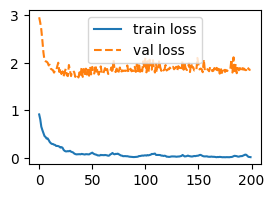

In [ ]:
# np.random.seed(1234)
# test_index = np.random.choice(selected_datasets, size=5, replace=False)
# # test_index = selected_datasets
# train_index = [i for i in range(mixed_X.shape[0]) if i not in test_index]
# X_train, X_test = X[train_index], X[test_index]
# Y_trainr, Y_testr = Y[train_index], Y[test_index]
# Y_trainn, Y_testn = Yn[train_index], Yn[test_index]
# embeddings = [Xemb]
# # network = nn.Sequential(
# #     nn.Linear(X_train.shape[1], 64),
# #     nn.ReLU(),
# #     nn.Linear(64, 32),
# #     nn.ReLU(),
# #     nn.Linear(32, 16),
# # )

# # network = nn.Sequential(
# #     View((-1, 1, X_train.shape[1])),
# #     nn.Conv1d(1, 8, 5, stride=1, padding="same"), #300
# #     nn.ReLU(),
# #     nn.Conv1d(8, 8, 3, stride=3, padding=0), #100
# #     nn.ReLU(),
# #     nn.Conv1d(8, 16, 3, stride=1, padding="same"), #100
# #     nn.ReLU(),
# #     nn.Conv1d(16, 16, 2, stride=2, padding=0), #50
# #     nn.ReLU(),
# #     nn.Conv1d(16, 32, 3, stride=1, padding=0), #48
# #     nn.ReLU(),
# #     nn.Conv1d(32, 64, 4, stride=4, padding=0), #12
# #     nn.ReLU(),
# #     nn.Conv1d(64, 128, 3, stride=3, padding=0), #4
# #     nn.ReLU(),
# #     nn.Flatten(),
# #     nn.Linear(128*4, 32)
# #     # nn.ReLU(),
# #     # nn.Linear(256, 32)
# # )
# # network.to(device)
# # model = MetaModel(network, margin=1, device=device)
# network = nn.Sequential(
#     nn.Linear(X_train.shape[1], 64),
#     nn.ReLU(),
#     nn.Linear(64, 32),
#     nn.ReLU(),
#     nn.Linear(32, 16),
#     # nn.ReLU(),
#     # nn.Linear(16, 8)
# )
# network.to(device)
# decoder = nn.Sequential(
#     # nn.Linear(8, 16),
#     # nn.ReLU(),
#     nn.Linear(16, 32),
#     nn.ReLU(),
#     nn.Linear(32, 64),
#     nn.ReLU(),
#     nn.Linear(64, X_train.shape[1])
# )
# decoder.to(device)
# model = MetaModel2(network, decoder, device=device)

# for i in range(1):
#     metric_learning_params = {
#         "lr": 1e-3,
#         "weight_decay": 1e-4,
#         "epochs": 200,
#         "batch_size_train": 16,
#         "batch_size_val": 16,
#     }
#     # new_X_train = []
#     # for x in X_train:
#     #     for _ in range(100):
#     #         new_X_train.append(np.random.normal(x, 0.01))
#     # new_X_train = np.array(new_X_train)
#     model.train_metric_learner(
#         X_train,
#         metric_learning_params,
#         X_val=X_test
#     )
#     plt.figure(figsize=(3, 2))
#     plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
#     plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
#     plt.legend()
#     plt.show()
    
#     embeddings.append(TSNE(n_components=2).fit_transform(model.embbed(mixed_X)))

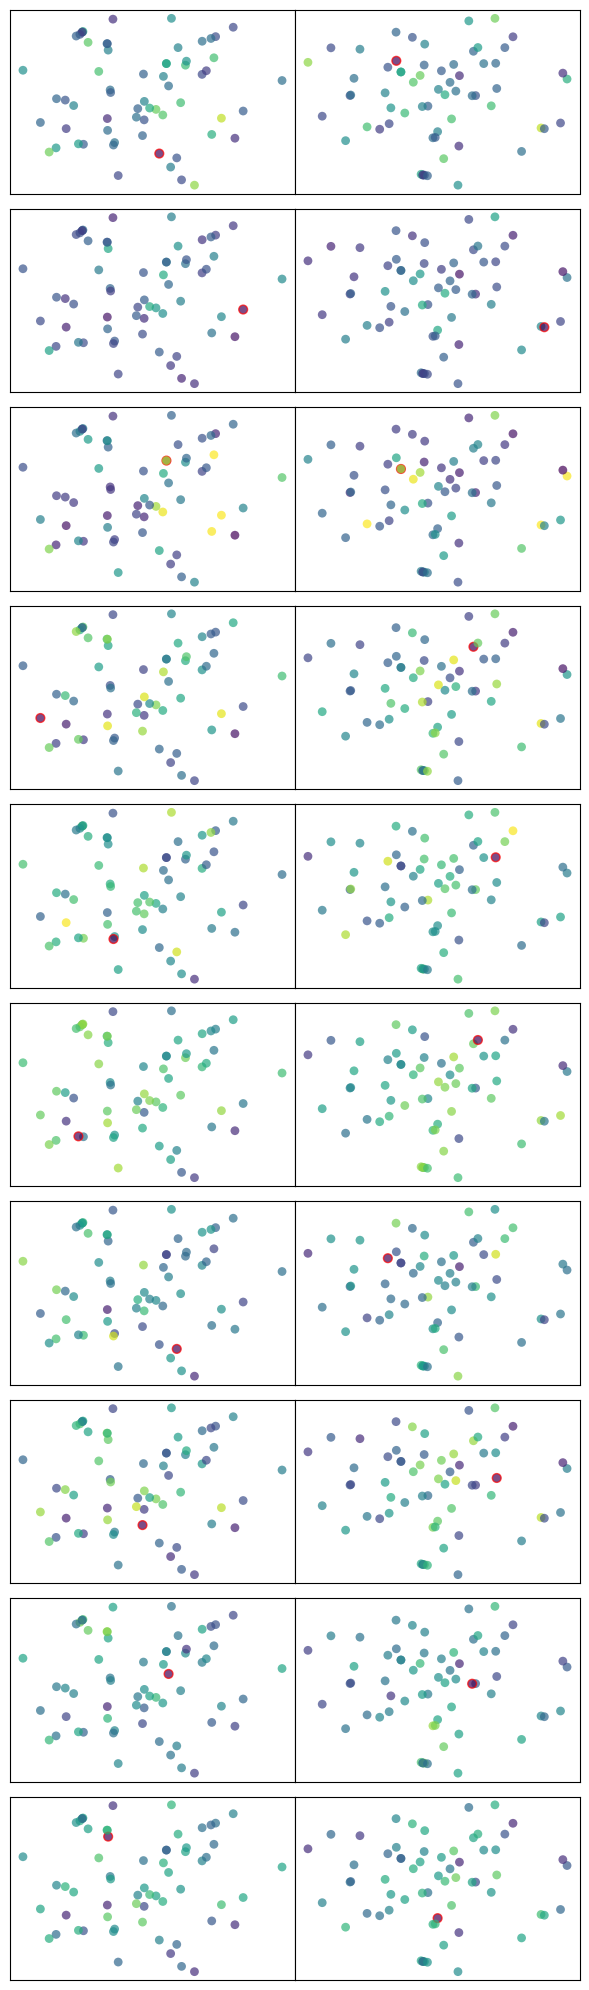

In [ ]:
# rows, cols = len(test_index), len(embeddings)
# plt.figure(figsize=(cols*3, rows*2))
# for i, ind in enumerate(test_index):
#     for j, Z in enumerate(embeddings):
#         plt.subplot(rows, cols, i*cols + j + 1)
#         plt.scatter(
#             Z[:, 0], Z[:, 1], c=sim_matrix[ind][:mixed_X.shape[0]], s=40, alpha=0.7, 
#             edgecolors=['none' if k!=ind else "red" for k in range(Z.shape[0])],
#             linewidth=[0 if  k!=ind else 1 for k in range(Z.shape[0])],
#             vmin=0., vmax=1)
#         # plt.colorbar()
#         plt.xticks([])
#         plt.yticks([])
# plt.tight_layout(w_pad=0)
# plt.show()

In [ ]:
from sklearn.model_selection import KFold
ranking_model_names = ["KNN", "RF", "KNN with aug.", "RF with aug."]
for name in ranking_model_names:
    predictions[f"AE+{name}"] = np.zeros(shape=Y[selected_datasets].shape)

i = 0
for train, test in KFold(n_splits=10, shuffle=True, random_state=0).split(X[selected_datasets]):
    print(i, "---------------------------------------")
    test_index = selected_datasets[test]

    train_index = [i for i in range(mixed_X.shape[0]) if i not in test_index]
    train_index_aug = [i for i in range(X.shape[0]) if i not in test_index]
    X_train, X_test = X[train_index], X[test_index]
    Y_trainr, Y_testr = Y[train_index], Y[test_index]
    Y_trainn, Y_testn = Yn[train_index], Yn[test_index]
    X_train_aug = X[train_index_aug]
    Y_trainr_aug = Y[train_index_aug]
    Y_trainn_aug = Yn[train_index_aug]

    network = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16)
    )
    network.to(device)
    decoder = nn.Sequential(
        # nn.Linear(8, 16),
        # nn.ReLU(),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, X_train.shape[1])
    )
    decoder.to(device)
    model = MetaModel2(network, decoder, device=device)
    metric_learning_params = {
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "epochs": 200,
        "batch_size_train": 16,
        "batch_size_val": 16,
    }
    model.train_metric_learner(
        X_train,
        metric_learning_params,
        X_val=X_test
    )

    # plt.figure(figsize=(4, 2.5))
    # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    # plt.legend()
    # plt.show()

    Z_train = model.embbed(X_train)
    for name in ["KNN", "RF"]:
        model.ranker = ALL_MODELS[name]()
        model.train_ranker(Z_train, Y_trainr)
        predictions[f"AE+{name}"][test] = model.predict(X_test)

    network = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16)
    )
    network.to(device)
    decoder = nn.Sequential(
        # nn.Linear(8, 16),
        # nn.ReLU(),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, X_train.shape[1])
    )
    decoder.to(device)
    model = MetaModel2(network, decoder, device=device)
    metric_learning_params = {
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "epochs": 200,
        "batch_size_train": 16,
        "batch_size_val": 16,
    }
    model.train_metric_learner(
        X_train_aug,
        metric_learning_params,
        X_val=X_test
    )

    # plt.figure(figsize=(4, 2.5))
    # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    # plt.legend()
    # plt.show()

    Z_train_aug = model.embbed(X_train_aug)
    for name in ["KNN with aug.", "RF with aug."]:
        model.ranker = ALL_MODELS[name.split(" ")[0]]()
        model.train_ranker(Z_train_aug, Y_trainr_aug)
        predictions[f"AE+{name}"][test] = model.predict(X_test)
    i += 1

0 ---------------------------------------
Epoch 1/200: train_loss=1.27, val_loss=0.725
Epoch 2/200: train_loss=1.27, val_loss=0.724
Epoch 3/200: train_loss=1.26, val_loss=0.724
Epoch 4/200: train_loss=1.25, val_loss=0.723
Epoch 5/200: train_loss=1.24, val_loss=0.721
Epoch 6/200: train_loss=1.23, val_loss=0.719
Epoch 7/200: train_loss=1.22, val_loss=0.716
Epoch 8/200: train_loss=1.2, val_loss=0.711
Epoch 9/200: train_loss=1.18, val_loss=0.707
Epoch 10/200: train_loss=1.16, val_loss=0.7
Epoch 11/200: train_loss=1.13, val_loss=0.692
Epoch 12/200: train_loss=1.1, val_loss=0.684
Epoch 13/200: train_loss=1.06, val_loss=0.674
Epoch 14/200: train_loss=1.01, val_loss=0.664
Epoch 15/200: train_loss=0.964, val_loss=0.656
Epoch 16/200: train_loss=0.914, val_loss=0.651
Epoch 17/200: train_loss=0.868, val_loss=0.648
Epoch 18/200: train_loss=0.83, val_loss=0.646
Epoch 19/200: train_loss=0.8, val_loss=0.638
Epoch 20/200: train_loss=0.771, val_loss=0.624
Epoch 21/200: train_loss=0.739, val_loss=0.608
E

In [ ]:
from sklearn.model_selection import KFold
ranking_model_names = ["KNN", "RF", "KNN with aug.", "RF with aug."]
for name in ranking_model_names:
    predictions[f"Mtrl+{name}"] = np.zeros(shape=Y[selected_datasets].shape)

i = 0
for train, test in KFold(n_splits=10, shuffle=True, random_state=0).split(X[selected_datasets]):
    print(i, "---------------------------------------")
    test_index = selected_datasets[test]

    train_index = [i for i in range(mixed_X.shape[0]) if i not in test_index]
    train_index_aug = [i for i in range(X.shape[0]) if i not in test_index]
    X_train, X_test = X[train_index], X[test_index]
    Y_trainr, Y_testr = Y[train_index], Y[test_index]
    Y_trainn, Y_testn = Yn[train_index], Yn[test_index]
    X_train_aug = X[train_index_aug]
    Y_trainr_aug = Y[train_index_aug]
    Y_trainn_aug = Yn[train_index_aug]

    network = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16)
    )
    network.to(device)
    model = MetaModel(network, margin=1, device=device)
    metric_learning_params = {
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "epochs": 100,
        "batch_size_train": 32,
        "batch_size_val": 32,
    }
    model.train_metric_learner(
        X_train, Y_trainn,
        metric_learning_params,
        X_val=X_test, Y_val=Y_testn
    )

    # plt.figure(figsize=(4, 2.5))
    # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    # plt.legend()
    # plt.show()

    Z_train = model.embbed(X_train)
    for name in ["KNN", "RF"]:
        model.ranker = ALL_MODELS[name]()
        model.train_ranker(Z_train, Y_trainn)
        predictions[f"Mtrl+{name}"][test] = model.predict(X_test)

    ##################################################
    network = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16)
    )
    network.to(device)
    model = MetaModel(network, margin=1, device=device)
    metric_learning_params = {
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "epochs": 100,
        "batch_size_train": 64,
        "batch_size_val": 64,
    }
    model.train_metric_learner(
        X_train_aug, Y_trainn_aug,
        metric_learning_params,
        X_val=X_test, Y_val=Y_testn
    )

    # plt.figure(figsize=(4, 2.5))
    # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    # plt.legend()
    # plt.show()

    Z_train_aug = model.embbed(X_train_aug)
    for name in ["KNN with aug.", "RF with aug."]:
        model.ranker = ALL_MODELS[name.split(" ")[0]]()
        model.train_ranker(Z_train_aug, Y_trainn_aug)
        predictions[f"Mtrl+{name}"][test] = model.predict(X_test)
    i+=1

0 ---------------------------------------
classes distribution in train set: (array([0, 1]), array([160, 411], dtype=int64))
classes distribution in train set: (array([0, 1]), array([ 20, 108], dtype=int64))
Epoch 1/100: train_loss=0.215 sim=0.329 dis=0.276, val_loss=0.139 sim=0.469 dis=0.512
Epoch 2/100: train_loss=0.135 sim=0.479 dis=0.56, val_loss=0.108 sim=0.657 dis=0.735
Epoch 3/100: train_loss=0.136 sim=0.614 dis=0.653, val_loss=0.107 sim=0.662 dis=0.75
Epoch 4/100: train_loss=0.126 sim=0.589 dis=0.655, val_loss=0.104 sim=0.65 dis=0.744
Epoch 5/100: train_loss=0.117 sim=0.571 dis=0.675, val_loss=0.0998 sim=0.648 dis=0.748
Epoch 6/100: train_loss=0.11 sim=0.558 dis=0.694, val_loss=0.0951 sim=0.644 dis=0.752
Epoch 7/100: train_loss=0.104 sim=0.55 dis=0.717, val_loss=0.0913 sim=0.636 dis=0.751
Epoch 8/100: train_loss=0.0996 sim=0.536 dis=0.733, val_loss=0.0877 sim=0.627 dis=0.746
Epoch 9/100: train_loss=0.096 sim=0.525 dis=0.745, val_loss=0.0858 sim=0.621 dis=0.742
Epoch 10/100: tra

In [ ]:
baseline_pairs = {
    "haverage": "manhattan_hamming",
    "fasterpam": "euclidean_hamming",
    "kprototypes": "sqeuclidean_hamming",
}
similarity_pairs = benchmark_results[algorithm]["original"][eval_metric].columns
sim_pairs_index = dict(zip(similarity_pairs, range(len(similarity_pairs))))

ndcg_ranks = [1, 3, 5, 10, 15, 20]
n_bests = [1, 3, 5, 10]
ndcg_scores = {
    model_name: {p: np.zeros(len(selected_datasets)) for p in ndcg_ranks}
    for model_name in predictions
} #| {'ensemble': {p: np.zeros(meta_X.shape[0]) for p in ndcg_ranks}}

lb_scores = np.zeros(len(selected_datasets))
rb_scores = {k: np.zeros(len(selected_datasets)) for k in n_bests}
mb_scores = np.zeros(len(selected_datasets))
model_scores = {
    model_name: {k: np.zeros(len(selected_datasets)) for k in n_bests}
    for model_name in predictions
} #| {'ensemble': {k: np.zeros(len(test_index)) for k in n_bests}}

for name, Y_pred in predictions.items():
    Y_pred = np.array(Y_pred)
    for p in ndcg_ranks:
        ndcg_scores[name][p] = ndcg(Y[selected_datasets], Y_pred, p=p)

for name, Y_pred in predictions.items():
    Y_pred = np.array(Y_pred)
    for k in n_bests:
        model_scores[name][k] = np.array(
            [max(y[y > 0][np.argsort(-Y_pred[i][y > 0])[:k]]) for i, y in enumerate(Y[selected_datasets])])

for k in n_bests:
    rb_scores[k] = np.array(
        [max(np.random.choice(y[y > 0], k)) for y in Y[selected_datasets]])

lb_scores = Y[selected_datasets][:, sim_pairs_index[baseline_pairs[algorithm]]]
mb_scores = np.array([max(y) for y in Y[selected_datasets]])

c:\Users\abdou\Documents\Workspace\Recherche\simrec-for-mdc\venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\abdou\Documents\Workspace\Recherche\simrec-for-mdc\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


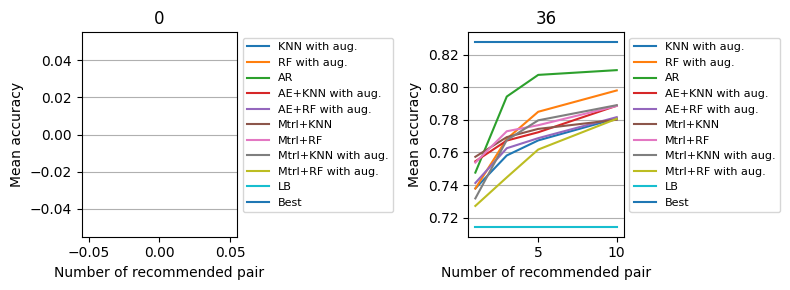

In [ ]:
import matplotlib.pyplot as plt

list_indices = [
    [i for i, y in enumerate(Y[selected_datasets]) if np.mean(1 - y[y>0]/max(y[y>0])) < 0.0], #test_index[i] in base_datasets and # i in test and
    [i for i, y in enumerate(Y[selected_datasets]) if np.mean(1 - y[y>0]/max(y[y>0])) >= 0.]
]
rows, cols = 1, len(list_indices)
plt.figure(figsize=(cols*4, rows*3))
subplot_num = 1
exclude = ["KNN", "RF", "AE+KNN", "AE+RF"] #"KNN with aug.", "RF with aug."
for indices in list_indices:
    scores = {k:v for k, v in model_scores.items() if k not in exclude} 
    # scores["RB"] = rb_scores
    scores["LB"] = lb_scores
    scores["Best"] = mb_scores

    y = {key: [] for key in scores}

    for name, score in scores.items():
        for k in n_bests:
            u = score[indices] if name in ["LB", "Best"] else score[k][indices]
            y[name].append(np.mean(u))

    plt.subplot(rows, cols, subplot_num)
    for name, values in y.items():
        plt.plot(n_bests, values, label=name)
    plt.ylabel("Mean accuracy")
    plt.xlabel("Number of recommended pair")
    # plt.ylim((0.67, 0.9))
    plt.legend(fontsize=8, loc= "upper left", bbox_to_anchor= (1, 1))
    plt.grid(axis="y")
    plt.title(len(indices))
    subplot_num += 1
plt.tight_layout()
# plt.savefig("output/mean_acc2.svg")
plt.show()

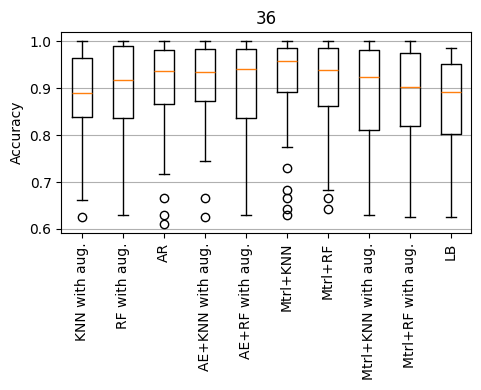

In [ ]:
import matplotlib.pyplot as plt

indices = [i for i, y in enumerate(Y[selected_datasets]) if np.mean(1 - y[y>0]/max(y[y>0])) >= 0.]

exclude = ["KNN", "RF", "AE+KNN", "AE+RF"]
scores = {k:v for k, v in model_scores.items() if k not in exclude} 
# scores["RB"] = rb_scores
scores["LB"] = lb_scores

y = {key: [] for key in scores}
k = 1
best_scores = mb_scores[indices]
for name, score in scores.items():
    u = score[indices] if name in ["LB", "Best"] else score[k][indices]
    y[name] = u/best_scores

plt.figure(figsize=(5, 4))
plt.boxplot(y.values(), labels=y.keys())
plt.ylabel("Accuracy")
# plt.ylim((0.67, 0.9))
plt.xticks(rotation="vertical")
# plt.legend(fontsize=8, loc= "upper left", bbox_to_anchor= (1, 1))
plt.grid(axis="y")
plt.title(len(indices))
plt.tight_layout()
# plt.savefig("output/mean_acc2.svg")
plt.show()

In [ ]:
# baselines = ["LB"]
# k = 1
# plt.figure(figsize=(5, 3))
# # if j == 0:
# #     ax = plt.subplot(2, 1, 1)
# # else:
# #     ax = plt.subplot(2, 1, 2)
# # res = results[algo]

# best_scores = mb_scores
# y = {}
# l = [(np.std(y[y>0])) for i, y in enumerate(Y)]
# x = np.array([np.quantile(l, q) for q in np.linspace(0, 1, 5)])

# x[0] -= 1e-4
# diff = 0.025
# list_indices = [
#     [xr < np.std(y[y>0]) <= x[r+1] for i, y in enumerate(Y)]
#     for r, xr in enumerate(x[:-1])
# ] #

# for model_name, scores in model_scores.items():
#     y[model_name] = []
#     for i, indices in enumerate(list_indices):
#         # new_ind = [val and lb_scores[j] >, 0, for j, val in enumerate(indices)]
#         v = np.mean(((scores[k])/best_scores)[indices])
#         y[model_name].append(v)

# y["LB"] = []
# for i, indices in enumerate(list_indices):
#     v = np.mean(((lb_scores)/best_scores)[indices])
#     y["LB"].append(v)

# n_bar = len(y)
# w = 0.8/n_bar
# z = np.arange(len(x))
# i = 0
# max_ = np.zeros(len(list_indices))
# min_ = np.ones(len(list_indices))*100
# for model_name, values in y.items():
#     max_ = np.maximum(max_, values)
#     min_ = np.minimum(min_, values)
#     # plt.plot(z[:-1]+0.5, values, "--", linewidth=0.7, label=None, alpha=1 if i<6 else 0.7, zorder=10)
#     # plt.scatter(z[:-1]+0.5, values, label=model_name, s=[10*np.log(sum(val)) for val in list_indices], alpha=1 if i<6 else 0.7, zorder=10)
#     plt.plot(z[:-1]+0.5, values, "--o" if model_name not in baselines else "-s", linewidth=0.7 if model_name not in baselines else 1, label=model_name, markersize=3, zorder=10)
#     i += 1

# for ind, val in enumerate(list_indices):
#     if ind >= 1:
#         plt.annotate(f"{max_[ind]:.2g}%", (z[ind]+0.5, max_[ind]+1), fontsize=8, ha="center", va="top")

# # plt.bar(x[1:]-diff/2, [50 for _ in diff], width=diff[0], zorder=0, label=None, color="None", edgecolor="gray")

# plt.xlim((z[0], z[-1]))
# plt.ylabel("Difference to the best (%)")
# plt.xticks(z, [f"{max(0, val*100):.1f}" for val in x])
# # plt.ylim((min(min_)-1, max(max_)+1))
# plt.grid(axis="x")
# plt.legend(fontsize=8, loc= "upper left", bbox_to_anchor= (1, 1), frameon=False)
# plt.xlabel("$\delta$ (%)")

# # if j == 0:
# #     plt.legend(fontsize=8, loc= "upper left", bbox_to_anchor= (1, 1), frameon=False)
# # if j == 1: 
# #     plt.xlabel("$\delta$ (%)")
# # j += 1
# # plt.title(names[algo], y=0.83)

# plt.tight_layout()
# # if savedir is not None:
# #     plt.savefig(os.path.join(savedir, f"diff_best_delta_{algo}_{k}.pdf"))
# plt.show()